<a href="https://colab.research.google.com/github/ezhil384/ezhil384/blob/Audio-classification-of-coughs/Coswara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the data repository from the original github source. Alternatively we can download it into our google drive and run the code from there

In [ ]:
!git clone https://github.com/iiscleap/Coswara-Data
%cd Coswara-Data

Cloning into 'Coswara-Data'...
remote: Enumerating objects: 621, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
^C
[Errno 2] No such file or directory: 'Coswara-Data'
/content


Reading the combined data file with all the users and their information

In [ ]:
!python extract_data.py

python3: can't open file 'extract_data.py': [Errno 2] No such file or directory


#Google drive
This cell is if you have loaded the repository on your google drive. For convenience I have run the dataset on my drive. I suggest you do the same since all the files have been loaded there

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Sample of how to read a csv file with pandas for further work

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Coswara-Data/20210630/20210630.csv')
df['relative']='/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20210630/'+df['id']+'/cough-heavy.wav'
df=df[['relative','covid_status']]
df.head()

,relative,covid_status
0,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_asymp
1,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_moderate
2,/content/gdrive/MyDrive/Coswara-Data/Extracted...,no_resp_illness_exposed
3,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_mild
4,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_moderate


#CSV file for ML
This is a CSV file created having only the audio paths of the coughs of people along with their covid status as either 0 for healthy or 1 for covid infected.
There are 2 files in the repository created and if you use them do not run this cell.

In [4]:
# import required module
from pathlib import Path
import os
import csv
import pandas as pd
import librosa
df1 = pd.read_csv('/content/gdrive/MyDrive/Coswara-Data/combined_data.csv')
print(pd.unique(df1['covid_status']))

# assign directory
directory = '/content/gdrive/MyDrive/Coswara-Data/'
with open('final.csv','w') as fappend:
  csvwriter=csv.writer(fappend)
  csvwriter.writerow(['relative_path','classID'])
lisdir = os.listdir(directory)
lisdir.reverse()
lisdir=lisdir[:26]
print(len(lisdir))  #finding the length of the directory
for filename in lisdir:
    f = os.path.join(directory, filename)
    if os.path.isdir(f):
      l = os.listdir(f)
      met=os.path.join(f, l[0])
      if os.path.isdir(met)==False:
        print (met)
        with open(met, 'r') as fread,open('final.csv','a') as fappend:
          csvreader = csv.reader(fread)
          csvwriter = csv.writer(fappend)
          new_rows_list=[]
          x=0
          for row in csvreader:
            if (x==1):
              aud1 = '/content/gdrive/MyDrive/Coswara-Data/Extracted_data/'+filename+'/'+row[0]+'/cough-heavy.wav'
              aud2 = '/content/gdrive/MyDrive/Coswara-Data/Extracted_data/'+filename+'/'+row[0]+'/breathing-deep.wav'
              if (row[ind] in ['healthy','recovered_full','no_resp_illness_exposed']): 
                  new_rows_list.append([aud1,0])
              elif (row[ind] in ['positive_mild','positive_asymp','positive_moderate']):
                  new_rows_list.append([aud1,1])
            else:
              x=1
              ind=row.index('covid_status')
          csvwriter.writerows(new_rows_list)



['healthy' 'no_resp_illness_exposed' 'resp_illness_not_identified'
 'recovered_full' 'positive_mild' 'positive_asymp' 'positive_moderate']
26
/content/gdrive/MyDrive/Coswara-Data/20210630/20210630.csv
/content/gdrive/MyDrive/Coswara-Data/20210618/20210618.csv
/content/gdrive/MyDrive/Coswara-Data/20210603/20210603.csv
/content/gdrive/MyDrive/Coswara-Data/20210523/20210523.csv
/content/gdrive/MyDrive/Coswara-Data/20210507/20210507.csv
/content/gdrive/MyDrive/Coswara-Data/20210426/20210426.csv
/content/gdrive/MyDrive/Coswara-Data/20210419/20210419.csv
/content/gdrive/MyDrive/Coswara-Data/20210406/20210406.csv
/content/gdrive/MyDrive/Coswara-Data/20210206/20210206.csv
/content/gdrive/MyDrive/Coswara-Data/20201221/20201221.csv
/content/gdrive/MyDrive/Coswara-Data/20201130/20201130.csv
/content/gdrive/MyDrive/Coswara-Data/20201031/20201031.csv
/content/gdrive/MyDrive/Coswara-Data/20201012/20201012.csv
/content/gdrive/MyDrive/Coswara-Data/20200930/20200930.csv
/content/gdrive/MyDrive/Coswara-

This is the first few contents of the csv file for the final deep learning

In [5]:
df = pd.read_csv('final.csv')
df.head()


,relative_path,classID
0,/content/gdrive/MyDrive/Coswara-Data/Extracted...,1
1,/content/gdrive/MyDrive/Coswara-Data/Extracted...,1
2,/content/gdrive/MyDrive/Coswara-Data/Extracted...,0
3,/content/gdrive/MyDrive/Coswara-Data/Extracted...,1
4,/content/gdrive/MyDrive/Coswara-Data/Extracted...,1


In [6]:
df.relative_path.shape[0]

728

# Librosa 
Plotting the visual image of the wave form of the audio file - helps in running CNN classifiers

In [ ]:
!pip install librosa

# Audio file
Running an audio file on google colab using wavfile and Audio. Make sure that the file is in .wav format

In [7]:
from IPython.display import Audio
from scipy.io import wavfile
import librosa.display
import numpy as np
# Load the file on an object
data = wavfile.read('/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20201012/7arBtLdzGeW8oCN0DXhI6dqqUdP2/cough-heavy.wav')

# Separate the object elements
framerate = data[0]
sounddata = data[1]
time      = np.arange(0,len(sounddata))/framerate

# Show information about the object
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

#Playing the audio file
Audio(sounddata,rate=framerate)

Sample rate: 48000 Hz
Total time: 3.584 s


or

In [8]:
import IPython.display as ipd
ipd.Audio('/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20201012/7arBtLdzGeW8oCN0DXhI6dqqUdP2/cough-heavy.wav')

Here is a series of code that shows us how we can convert an audio clip to an image that is capable of training with a classifier.

(315392,)
48000


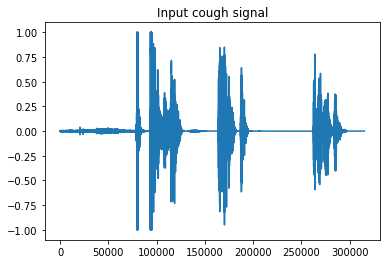

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import sys
import librosa.display
#Visualize cough signal
file = df.relative_path[628]
x,sr = librosa.load(file,sr=None) #to sample at  22050
print(x.shape)
plt.plot(x)
plt.title("Input cough signal")
print(sr)

(1025, 617)


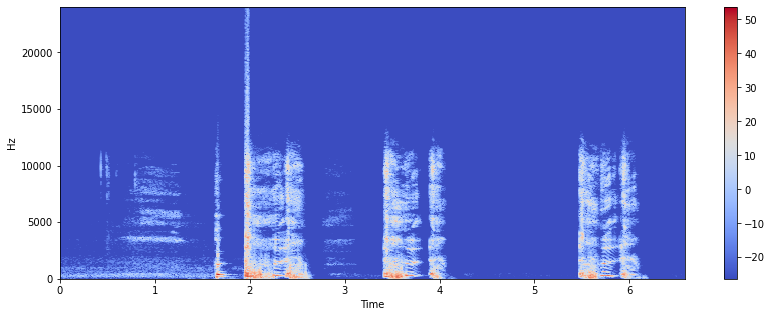

In [10]:
#display Spectrogram
Xy = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(Xy))
print(Xdb.shape)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 617)


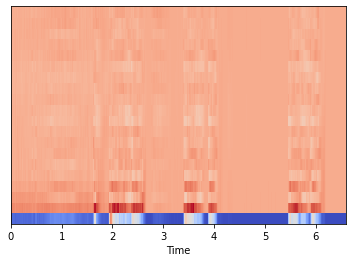

In [11]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

To create a csv file containing all the audios along with their covid status

# For the dataset
Contains all libraries for the audio processing

In [ ]:
! pip install torchaudio

##GAP

In [12]:
import pandas as pd
import os
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf

/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20200911/VXCvsGinvzPFVkLNlvJFw7z9G8j1/cough-heavy.wav
48000
(188416,)


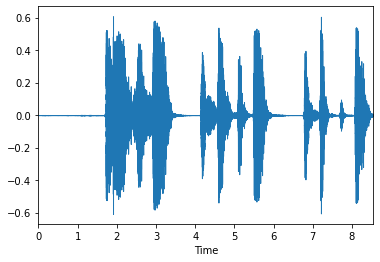

In [13]:
sample_num=555
#get the filename 
df = pd.read_csv("final.csv")
filename=df.relative_path[sample_num]
print(filename)
y,sr=lr.load(filename,sr=None) #load the file
print(sr)
lr.display.waveplot(y,sr=22050, x_axis='time')
print(y.shape)

In [14]:
def audio_to_image(path, height=128, width=1000):
    signal, sr = lr.load(path,res_type='kaiser_fast')
    hl = signal.shape[0]//(width*1.1)
    spec = lr.feature.melspectrogram(signal, n_mels=height, hop_length=int(hl))    
    img = lr.power_to_db(spec)**2
    start = (img.shape[1] - width) // 2
    return img[:, start:start+width]

In [15]:
y = df.classID[:650] #stores the covid status of the data in the file
print(y.shape[0])

650


In [16]:
X=np.zeros((y.shape[0],128,1000))
print(X.shape)

(650, 128, 1000)


The dataset contains only 250 cases of positive covid patients and therefore the training dataset must contain equivalent numbers. Hence a total of 650 is good enough

Stores the values of the entire batch inside the array X which is eventually the training set

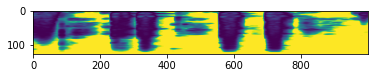

In [17]:
for i in range (y.shape[0]):
  if i in [337,598,626]: #corrupted files
    continue
  X[i] = audio_to_image(df.relative_path[i])
X[337]=audio_to_image(df.relative_path[650])
X[598]=audio_to_image(df.relative_path[651])
X[626]=audio_to_image(df.relative_path[652])
test_img=X[533]
plt.imshow(test_img)
plt.show()
#X = generate_features(X)

In [18]:
df=df.drop([337,598,626])

In [ ]:
#testing cell 337 598 626

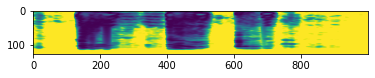

In [19]:
test_img=X[545]
plt.imshow(test_img)
plt.show()

In [20]:
X = np.asarray(X).reshape((-1, 128, 1000, 1))
X = np.array((X-np.min(X))/(np.max(X)-np.min(X)))
X = X/np.std(X)
y = np.array(y)

(128, 1000)


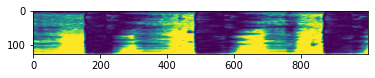

In [21]:
print(X[333,:,:,0].shape)
plt.imshow(X[333,:,:,0])
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
print(X_train.shape,X_test.shape)


(520, 128, 1000, 1) (130, 128, 1000, 1)


In [34]:
input_shape=(128,1000,1)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(16, activation='relu'))
CNNmodel.add(layers.Dense(1, activation='sigmoid'))
CNNmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history = CNNmodel.fit(X_train, y_train,validation_data=(X_test,y_test),epochs = 5)

Epoch 1/5
17/17 [==============================] - 112s 7s/step - loss: 0.5474 - accuracy: 0.7596 - val_loss: 0.7958 - val_accuracy: 0.5692
Epoch 2/5
17/17 [==============================] - 110s 6s/step - loss: 0.3952 - accuracy: 0.8423 - val_loss: 0.8325 - val_accuracy: 0.6385
Epoch 3/5
17/17 [==============================] - 112s 7s/step - loss: 0.2849 - accuracy: 0.9096 - val_loss: 0.8090 - val_accuracy: 0.5846
Epoch 4/5
17/17 [==============================] - 113s 7s/step - loss: 0.1346 - accuracy: 0.9673 - val_loss: 1.1209 - val_accuracy: 0.5615
Epoch 5/5
17/17 [==============================] - 113s 7s/step - loss: 0.0855 - accuracy: 0.9808 - val_loss: 1.1772 - val_accuracy: 0.5846


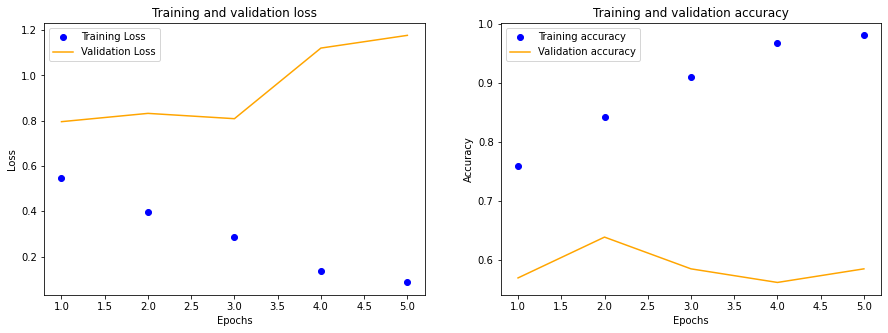

In [37]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,6)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

As you can see the dataset is either labelled wrongly or there are other factors to be taken care of before we can run this classification program